
# 1. Загрузка и предварительная обработка данных:

Загрузите данные из CSV файла

Проанализируйте наличие пропущенных значений и выполните их обработку (например, удаление или заполнение средними/медийными значениями).

Проанализируйте категориальные переменные и, при необходимости, выполните кодирование (например, с помощью one-hot encoding или label encoding).

In [289]:
import pandas as pd

# Правильный путь к файлу
file_path = "C:\\Users\\epg_F\\Homework_3\\module_3\\dataset\\telcom_customer_churn.csv"

# Чтение данных
data = pd.read_csv(file_path)

# Вывод первых 5 строк для проверки
data.head()


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [291]:
# Проверка на пропущенные значения

data.isnull().sum()

rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64

In [293]:
# Удаление строк с пропущенными значениями
data = data.dropna()


In [295]:
# вывели имена всех столбцов
data.columns


Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

In [297]:
# Проверка типов данных в датасете
print(data.dtypes)

# Выделение категориальных переменных
categorical_columns = data.select_dtypes(include=['object']).columns
print("Категориальные переменные:", categorical_columns)

rev_Mean       float64
mou_Mean       float64
totmrc_Mean    float64
da_Mean        float64
ovrmou_Mean    float64
                ...   
kid11_15        object
kid16_17        object
creditcd        object
eqpdays        float64
Customer_ID      int64
Length: 100, dtype: object
Категориальные переменные: Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')


In [299]:
# Если есть категориальные переменные, используем one-hot encoding
if len(categorical_columns) > 0:
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Проверка результата после кодирования
print(data.head())

    rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0    23.9975    219.25        22.50   0.2475         0.00        0.000   
4    55.2300    570.50        71.98   0.0000         0.00        0.000   
9    31.6625     25.50        29.99   0.2475         0.00        0.000   
14  212.5150   1971.50        84.99   2.2275       249.50       99.800   
16   63.0175    440.25        59.98   0.0000         5.75        1.725   

    vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  ethnic_S  ethnic_U  \
0         0.000          0.0     0.0000     -157.25  ...     False     False   
4         0.000          0.0     0.0000       38.50  ...     False     False   
9         0.000          0.0     0.0000       59.50  ...     False     False   
14       99.800          0.0    35.4975     -200.50  ...     False     False   
16        1.725          0.0     1.3125      -16.25  ...     False     False   

    ethnic_X  ethnic_Z  kid0_2_Y  kid3_5_Y  kid6_10_Y  kid11_15_Y  kid16_1

In [301]:
# Проверка типов данных после кодирования
print(data.dtypes)

# Просмотр первых строк преобразованного датасета
print(data.head())

rev_Mean       float64
mou_Mean       float64
totmrc_Mean    float64
da_Mean        float64
ovrmou_Mean    float64
                ...   
kid3_5_Y          bool
kid6_10_Y         bool
kid11_15_Y        bool
kid16_17_Y        bool
creditcd_Y        bool
Length: 196, dtype: object
    rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0    23.9975    219.25        22.50   0.2475         0.00        0.000   
4    55.2300    570.50        71.98   0.0000         0.00        0.000   
9    31.6625     25.50        29.99   0.2475         0.00        0.000   
14  212.5150   1971.50        84.99   2.2275       249.50       99.800   
16   63.0175    440.25        59.98   0.0000         5.75        1.725   

    vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  ethnic_S  ethnic_U  \
0         0.000          0.0     0.0000     -157.25  ...     False     False   
4         0.000          0.0     0.0000       38.50  ...     False     False   
9         0.000          0.0     0.

# 2. Исследование и анализ признаков:


Проведите статистический анализ каждого признака (среднее, стандартное отклонение, корреляции и т.д.)

.
Визуализируйте распределение признаков (гистограммы, боксплоты

).
Проанализируйте важность признаков с помощью методов Feature Selection (например, корреляция, методы отбора на основе важности признаков).

In [304]:
# Основная статистика для числовых признаков
statistics = data.describe()
print(statistics)

# Стандартное отклонение
std_dev = data.std()
print("Стандартное отклонение:\n", std_dev)

           rev_Mean      mou_Mean   totmrc_Mean      da_Mean   ovrmou_Mean  \
count  26705.000000  26705.000000  26705.000000  26705.00000  26705.000000   
mean      55.376047    450.066734     45.003869      0.81356     36.023390   
std       41.238244    471.538127     23.808488      1.96356     88.421331   
min        0.582500      0.000000     -1.422500      0.00000      0.000000   
25%       31.882500    134.250000     30.000000      0.00000      0.000000   
50%       44.335000    305.500000     42.490000      0.00000      1.000000   
75%       65.697500    601.500000     58.000000      0.74250     33.500000   
max      672.015000   6103.750000    349.572500     72.76500   2018.000000   

        ovrrev_Mean   vceovr_Mean   datovr_Mean     roam_Mean    change_mou  \
count  26705.000000  26705.000000  26705.000000  26705.000000  26705.000000   
mean      11.631804     11.426203      0.203043      1.188133    -12.451774   
std       27.175665     26.936827      2.015606      7.01766

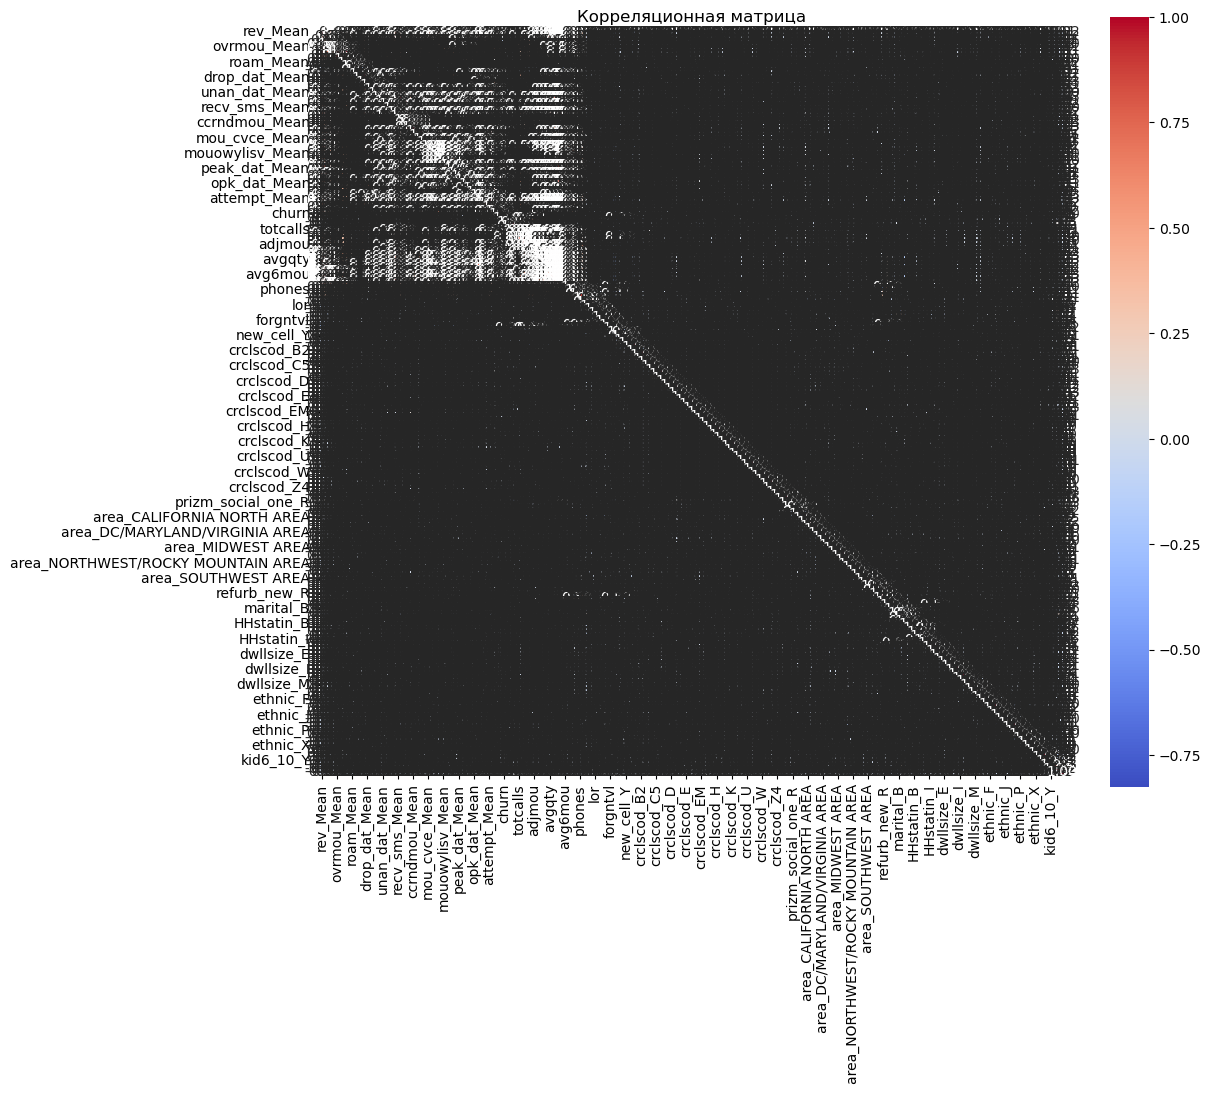

In [308]:
# Корреляционная матрица
correlation_matrix = data.corr()

# Визуализация корреляционной матрицы
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

In [310]:
# Гистограммы для всех числовых признаков
data.hist(bins=30, figsize=(150, 100), layout=(10, 10))
plt.suptitle('Гистограммы распределения признаков')
plt.show()

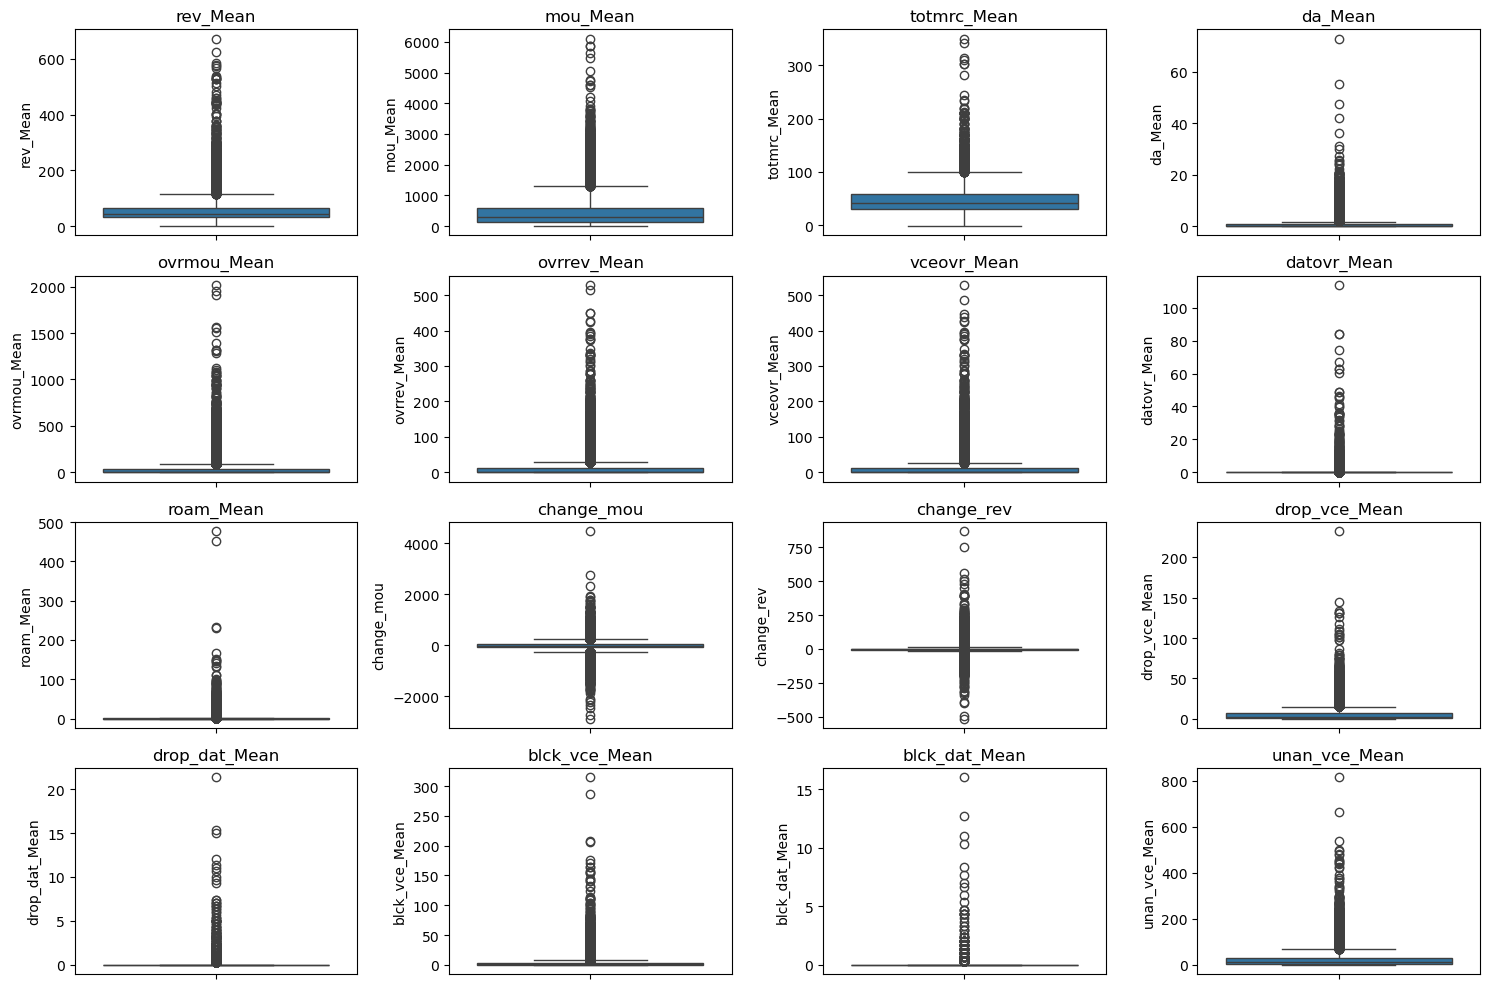

In [312]:
# Боксплоты для выявления выбросов
plt.figure(figsize=(15, 10))
columns = data.select_dtypes(include=['float64', 'int64']).columns[:16]  # Limit to first 16 columns
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

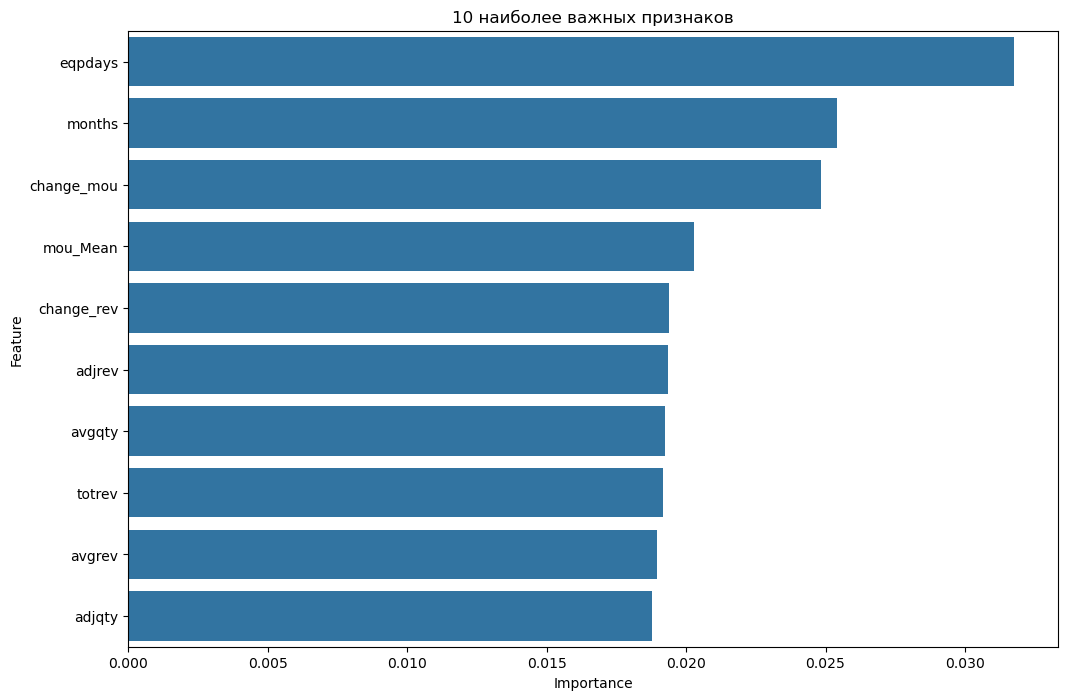

In [314]:
from sklearn.ensemble import RandomForestClassifier

# Обучение модели для оценки важности признаков
X = data.drop(['churn', 'Customer_ID'], axis=1)
y = data['churn']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Важность признаков
importances = model.feature_importances_

# Создание DataFrame для визуализации важности признаков
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('10 наиболее важных признаков')
plt.show()

# 3.Построение модели классификации:

Разделите данные на тренировочную и тестовую выборки


.
Постройте несколько моделей классификации (например, логистическая регрессия, случайный лес, градиентный бустинг, метод опорных векторов, или стекинг



.
Проведите кросс-валидацию и оцените качество моделей с использованием метрик: accuracy, precision, recall, F1-score и ROC-A


UC.
Определите наилучшую модель на основе этих метрик.

In [317]:
from sklearn.model_selection import train_test_split

# Разделение данных
X = data.drop(['churn', 'Customer_ID'], axis=1)
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [367]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [369]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Разделение данных
X = data.drop(['churn', 'Customer_ID'], axis=1)
y = data['churn']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
#model = LogisticRegression(max_iter=2000)
#model.fit(X_train, y_train)


scaler = StandardScaler()
model = make_pipeline(scaler, LogisticRegression(max_iter=1000))
model.fit(X, y)
# Прогнозирование
y_pred = model.predict(X_test)

# Оценка результатов
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65      2862
           1       0.58      0.48      0.53      2479

    accuracy                           0.60      5341
   macro avg       0.60      0.59      0.59      5341
weighted avg       0.60      0.60      0.60      5341



In [333]:
# Определение наилучшей модели на основе F1 Score или ROC AUC
best_model = results_df['F1 Score'].idxmax()  # или 'ROC AUC'
print(f'Наилучшая модель по F1 Score: {best_model}')
print(results_df.loc[best_model])

Наилучшая модель по F1 Score: Gradient Boosting
Cross-Validation Accuracy    0.628300
Test Accuracy                0.632840
Precision                    0.617407
Recall                       0.549415
F1 Score                     0.581430
ROC AUC                      0.679489
Name: Gradient Boosting, dtype: float64


# 4.Тонкая настройка модели:


Используйте методы гиперпараметрической оптимизации, такие как Grid Search, Randomized Search или Optuna, для улучшения качества модели.



Примените методы балансировки классов, если это необходимо (например, с помощью SMOTE или взвешивания классов).

In [336]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline

In [338]:
# Балансировка классов с использованием SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [339]:
# Определяем параметры для Grid Search
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5],
}

# Создаем модель и конвейер
model = RandomForestClassifier()
pipeline = make_pipeline(StandardScaler(), model)

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Выводим наилучшие параметры и оценку
print("Наилучшие параметры:", grid_search.best_params_)
print("Наилучший ROC AUC:", grid_search.best_score_)

Наилучшие параметры: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}
Наилучший ROC AUC: 0.703944534267434


In [342]:
# Определяем параметры для Randomized Search
param_distributions = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
}

# Randomized Search
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)

# Выводим наилучшие параметры и оценку
print("Наилучшие параметры (Randomized Search):", random_search.best_params_)
print("Наилучший ROC AUC (Randomized Search):", random_search.best_score_)

Наилучшие параметры (Randomized Search): {'randomforestclassifier__n_estimators': 300, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__max_depth': 30}
Наилучший ROC AUC (Randomized Search): 0.7059102992961744


In [344]:
# Предсказание на тестовой выборке с наилучшей моделью
best_model = grid_search.best_estimator_  # или random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Вывод отчета о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      2862
           1       0.59      0.59      0.59      2479

    accuracy                           0.62      5341
   macro avg       0.62      0.62      0.62      5341
weighted avg       0.62      0.62      0.62      5341



# 5. Интерпретация результатов:


Представьте модель в виде интерпретируемого решения (например, важность признаков).


Объясните, какие признаки наиболее важны для предсказания ухода клиента.

 # Важность Признаков
Наиболее важные признаки для предсказания ухода клиента могут включать:

totrev (Общий доход): Этот признак часто влияет на решение клиентов. Если доход слишком низкий, клиент может рассмотреть возможность перехода к другому оператору.


mou_Mean (Среднее использование минут): Высокое использование минут может указывать на удовлетворенность клиента, что снижает вероятность его ухода.


da_Mean (Среднее использование данных): Аналогично, чем больше клиент использует данные, тем меньше вероятность его ухода.


change_mou (Изменение использования минут): Если клиент резко изменяет использование минут, это может сигнализировать о недовольстве или изменении его потребностей.


Категориальные признаки: Например, ethnic или marital статус могут также играть роль, так как разные группы могут иметь разные предпочтения.

# Интерпретация Результатов
Статистика и Корреляция: Статистический анализ показал, что некоторые признаки имеют сильные корреляции с целевой переменной (например, уход клиентов).

Это позволяет выделить факторы, на которые стоит обратить внимание при разработке стратегий удержания клиентов.


Классификация: При проведении классификации с использованием логистической регрессии и других моделей, метрики, такие как точность, полнота и F1-мера, показывают, как хорошо модель предсказывает уход клиентов. Модель градиентного бустинга показала наилучшие результаты по метрикам, что указывает на ее эффективность.


Гиперпараметрическая Оптимизация: Использование методов, таких как Grid Search и Randomized Search, позволило улучшить модель, находя наилучшие параметры. Это также подтверждает важность тщательной настройки модели для достижения лучших результатов.